<a href="https://colab.research.google.com/github/Mrrohit0806/Capstone-project-01/blob/main/Feature_engineering_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import re

In [36]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [37]:
df = pd.read_csv('/content/gurgaon_properties_cleaned_lev02.csv')

In [38]:
df.duplicated().sum()

np.int64(125)

In [ ]:
# foucus on -> areaWithType, additional room, agePossession, furnishdeatils, feartures


1. **areaWithType**

In [51]:
# we have to extracts the super built up area
# Function for super built up area
def get_super_built_up_area(text):
  match = re.search(r'Super Built up area: (\d+\.\d+)', text)
  if match:
    return float(match.group(1))
  return None


In [46]:
# function for extracts the Built up area or Carpet area
def get_area(text, area_type):
  match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
  if match:
    return float(match.group(1))
  return None

In [47]:
# Function for checking if the area is provided in sq.m and convert it to sqft if needed
def convert_to_sqft(text, area_value):
  if area_value is None:
    return None
  match = re.search(r'{}\((\d+\.?\d*) sq.m.\)'.format(area_value),text)
  if match:
    sq_m_value = float(match.group(1))
    return sq_m_value * 10.7639 # Conversion factor
  return area_value


In [48]:
# extract super built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda row: convert_to_sqft(row['areaWithType'],row['super_built_up_area'] ), axis=1)

# extract Built up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x,'Built Up area'))
df['built_up_area'] = df.apply(lambda row: convert_to_sqft(row['areaWithType'],row['built_up_area'] ), axis=1)

#Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x,'Carpet area'))
df['carpet_area'] = df.apply(lambda row: convert_to_sqft(row['areaWithType'],row['carpet_area'] ), axis=1)

In [43]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3276,NaN,flat,1582.0,Super Built up area 1578(146.6 sq.m.),None,NaN,NaN
428,NaN,flat,1271.0,Super Built up area 1200(111.48 sq.m.),None,NaN,NaN
1358,4.75,house,2367.0,Plot area 263(219.9 sq.m.)Built Up area: 261 sq.yards (218.23 sq.m.)Carpet area: 259 sq.yards (216.56 sq.m.),None,261.0,259.0
2616,NaN,flat,930.0,Super Built up area 930(86.4 sq.m.),None,NaN,NaN
194,1.16,house,990.0,Carpet area: 110 (91.97 sq.m.),None,NaN,110.0


In [49]:
df.duplicated().sum()

np.int64(125)

In [50]:
# how many row have all the values of three areas
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(0, 7)

In [24]:
# Where all values is None we fill plot area
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [57]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,NaN,flat,1260.0,Super Built up area 1260(117.06 sq.m.),None,NaN,NaN
2,NaN,flat,1000.0,Super Built up area 1000(92.9 sq.m.),None,NaN,NaN
3,9.5,house,2367.0,Plot area 263(219.9 sq.m.),None,2367.0,NaN
4,NaN,flat,654.0,Super Built up area 623(57.88 sq.m.),None,NaN,NaN
6,NaN,flat,1395.0,Super Built up area 1395(129.6 sq.m.),None,NaN,NaN


In [81]:
# Function to extract super builduparea from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Super Built up area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [82]:
all_nan_df['super_built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)


In [83]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [84]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [85]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,NaN,flat,1260.0,Super Built up area 1260(117.06 sq.m.),1260.0,NaN,NaN
2,NaN,flat,1000.0,Super Built up area 1000(92.9 sq.m.),1000.0,NaN,NaN
3,9.5,house,2367.0,Plot area 263(219.9 sq.m.),NaN,263.0,NaN
4,NaN,flat,654.0,Super Built up area 623(57.88 sq.m.),623.0,NaN,NaN
6,NaN,flat,1395.0,Super Built up area 1395(129.6 sq.m.),1395.0,NaN,NaN


In [86]:
# Convert all type of scals in sqft

def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [88]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [89]:
# update the original dataframe
df.update(all_nan_df)

In [90]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,NaN,flat,1260.0,Super Built up area 1260(117.06 sq.m.),1260.0,NaN,NaN
2,NaN,flat,1000.0,Super Built up area 1000(92.9 sq.m.),1000.0,NaN,NaN
3,9.5,house,2367.0,Plot area 263(219.9 sq.m.),NaN,2367.0,NaN
4,NaN,flat,654.0,Super Built up area 623(57.88 sq.m.),623.0,NaN,NaN
6,NaN,flat,1395.0,Super Built up area 1395(129.6 sq.m.),1395.0,NaN,NaN


2. **additionalRoom**

In [91]:
df['additionalRoom'].value_counts()

,count
additionalRoom,
not available,1691
servant room,710
study room,251
others,237
pooja room,170
store room,107
"study room,servant room",100
"pooja room,servant room",84
"pooja room,study room,servant room,store room",72


In [92]:
# additional room
# we craat new coloums for diffirent type of rooms
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [93]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3769,servant room,0,1,0,0,0
166,pooja room,0,0,0,1,0
2599,servant room,0,1,0,0,0
3638,not available,0,0,0,0,0
1547,servant room,0,1,0,0,0


3.**agePossession**

In [94]:
df['agePossession'].value_counts()

,count
agePossession,
1 to 5 Year Old,1705
5 to 10 Year Old,610
0 to 1 Year Old,551
undefined,358
10+ Year Old,353
Under Construction,92
Within 6 months,70
Within 3 months,26
Dec 2023,22


In [95]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For recent entries
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [96]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [97]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1705
New Property,647
Moderately Old,610
Undefined,359
Old Property,353
Under Construction,287


4.**furnishDetails**

In [98]:
# There are lots of different types of details about these columns
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
498,"['1 Wardrobe', '1 Fan', '1 Geyser', '1 Light', '1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Swimming Pool', 'Park']"
3682,"['1 Water Purifier', '3 Fan', '1 Exhaust Fan', '1 Geyser', '8 Light', '2 Bed', '4 Wardrobe', '1 Sofa', '1 Washing Machine', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Stove', 'No TV']","['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Club house / Community Center']"
3799,NaN,['Visitor Parking']
2015,"['21 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Park', 'Visitor Parking', 'Low Density Society']"
3153,NaN,"['False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Park', 'Bank Attached Property', 'Visitor Parking', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal']"


In [99]:
# extact all unique furnishings from the furnishdtails column

all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2648229091.py:14: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [100]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

/tmp/ipython-input-114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [101]:
furnishings_df.sample(5)

,Curtains,Fridge,Washing Machine,Modular Kitchen,Exhaust Fan,Fan,Bed,Water Purifier,Light,AC,Wardrobe,Geyser,TV,Stove,Chimney,Sofa,Dining Table,Microwave
1383,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
786,0,0,0,0,1,2,1,1,7,1,1,0,0,1,0,0,0,0
1962,0,0,1,1,1,10,0,0,10,0,4,5,0,0,0,0,0,0
2284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2203,0,0,0,0,0,10,0,0,26,5,4,5,0,0,1,0,0,1


In [102]:
# Check the number of clusters that we make for our furniture details

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [104]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

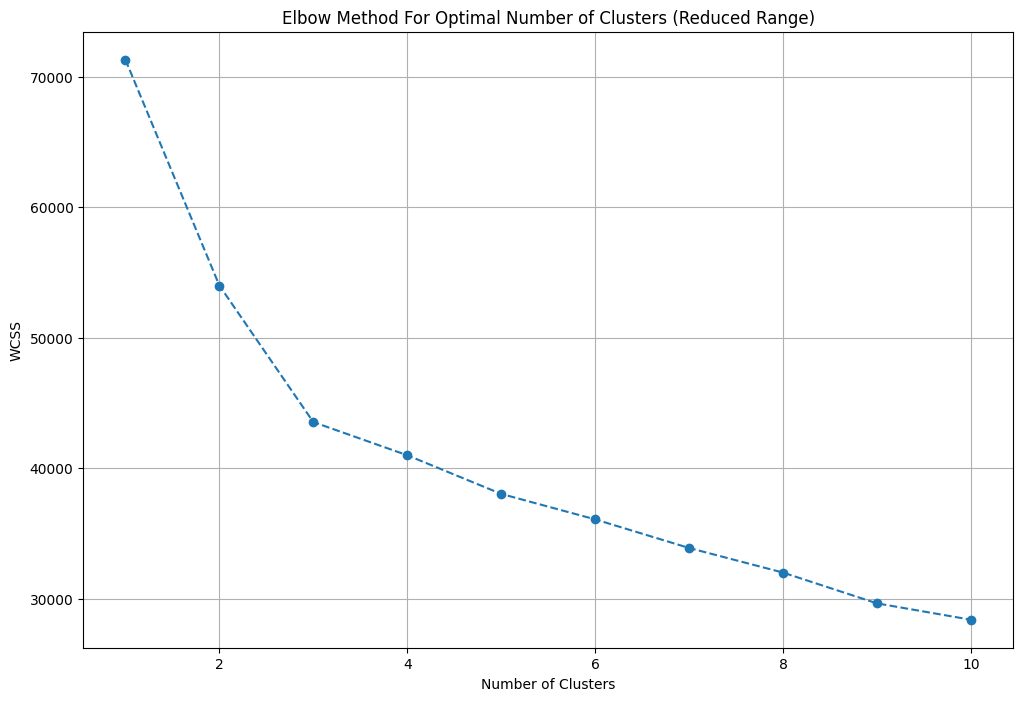

In [105]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [106]:
# for looking this graf we make number of clusters is should be 3
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [107]:
df = df.iloc[:,:-18]

In [108]:
df['furnishing_type'] = cluster_assignments

In [109]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
288,"['10 Fan', '5 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
2621,"['4 Wardrobe', '1 Water Purifier', '2 Fan', '1 Exhaust Fan', '1 Stove', '4 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']",2
2092,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
3376,"['3 Fan', '1 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
2060,NaN,0


5. **features**

In [110]:
df['features'].isnull().sum()

np.int64(709)

In [111]:
import pandas as pd
app_df = pd.read_csv('/content/Apartments deta set gurgaon.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [112]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [113]:
# Creat a temprary deta frame where thr features is null value
temp_df = df[df['features'].isnull()]

In [114]:
temp_df.shape

(709, 27)

In [120]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [117]:
df.loc[temp_df.index,'features'] = x.values

In [121]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [123]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [124]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [125]:
df['luxury_score'] = luxury_score

In [126]:
df.head()

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,Price_in_Crore,price,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,m3m heights,sector 65,15793.0,Super Built up area 1260(117.06 sq.m.),1260.0,2,2,2,not available,26.0,NaN,Under Construction,"['Rapid Metro Sector 56', 'M3m 65th Avenue Mall', 'Golf Course Extension Road', 'Gurgaon - Delhi Expy', 'DPS International School', 'DPG Institute of Technology', 'Park Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel', 'SkyJumper Trampoline Park', 'PVR Drive in Theatre']",[],"['Bus Shelter', 'Infinity Pool', 'Swimming Pool', 'Bar/Chill-Out Lounge', 'Reflexology Park', 'Aerobics Centre', 'Restaurant', 'Terrace Garden', 'High Speed Elevators']",1.99,NaN,1260.0,NaN,NaN,0,0,0,0,0,0,"[Bus Shelter, Infinity Pool, Swimming Pool, Bar/Chill-Out Lounge, Reflexology Park, Aerobics Centre, Restaurant, Terrace Garden, High Speed Elevators]",48
1,flat,trisara our homes 3,sohna road,4339.0,Built Up area: 484 (44.97 sq.m.),484.0,1,1,0,not available,2.0,NaN,Undefined,"['Metro Station', 'Gyanchand Market', 'Rajiv Chowk', 'KMP Expressway', 'Govt.Sr.Sec School(boys)', 'Jindal College', 'Kidzee', 'Vishvakarma Mandir', 'Mamta Hospital', 'Fortis', 'IGI T3', 'Oriental Bank of Commerce', 'Rajiv Gandhi Park']",NaN,NaN,0.21,NaN,None,484.0,NaN,0,0,0,0,0,0,[],0
2,flat,sare crescent parc,sector 92,5000.0,Super Built up area 1000(92.9 sq.m.),1000.0,2,2,3,not available,2.0,NaN,Moderately Old,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. Sarkar Clinic', 'Sagar Clinic', 'Vijay Petrol Pump', 'HP Petrol Pump', 'Essar Petrol Pump', 'Indian Oil']",[],"['Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",0.50,NaN,1000.0,NaN,NaN,0,0,0,0,0,0,"[Lift(s), Swimming Pool, Park, Visitor Parking, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",38
3,house,independent,sector 40,40135.0,Plot area 263(219.9 sq.m.),2367.0,12,12,3+,store room,4.0,NaN,New Property,"['Huda city centre metro station', 'Icici bank ATM', 'State bank of india ATM', 'Axis bank ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Axis bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Shivam Hospital Gurgaon', 'Dispencery', 'Ahmed Hospital Multi Speciality', 'Centre For Sight Gurgaon Sector 29', 'Dayal Eye & Maternity Centre', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Naval Mendiratta', 'Gardian Pharmacy', 'City Medical', 'Gardian Pharmacy', 'Pernod Ricard Charitable Dispensary', 'IBP Petrol Pump', 'Hdfc bank', 'Bar and restaurant', 'Fast food', 'Fast Food', 'Om Sweets', 'Cafe Coffee Day', 'Raj Restaurant', '32nd Milestone', 'Darbar', 'Dhabba', ""Hops 'N' Brew"", 'Pizza Hut', 'Spaghetti Kitchen & Bar', ""Domino's Pizza"", ""McDonald's"", 'Tocpao', 'Beer & Whisky Bar', 'Zura', 'The Oriental Bloom Chinese and Thai', 'CR Model Public School', 'St. Angels Jr', 'Salvan Public School', 'School of Inspired Leadership SOIL', 'Manav Rachna School', 'St. Angels Sr', 'Manav Rachna Swimming Pool']","['5 Wardrobe', '1 Water Purifier', '1 Exhaust Fan', '5 Geyser', '1 Stove', '1 Microwave', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Light', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Water purifier', 'False Ceiling Lighting', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Spacious Interiors']",NaN,9.5,None,2367.0,NaN,0,0,1,0,0,2,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Water purifier, False Ceiling Lighting, Water Storage, Piped-gas, Visitor Parking, Internet/wi-fi connectivity, Spacious Interiors]",57
4,flat,breez glo

In [127]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [128]:
df.sample(5)

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,price,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
357,flat,today callidora,sector 73,7692.0,Carpet area: 1300 (120.77 sq.m.),1300.0,2,2,2,13.0,NaN,New Property,1.00,NaN,None,NaN,1300.0,0,0,0,0,0,0,0
691,flat,ss the leaf,sector 85,7317.0,Super Built up area 1640(152.36 sq.m.)Carpet area: 1148 sq.ft. (106.65 sq.m.),1640.0,2,2,3+,14.0,East,Relatively New,1.20,NaN,None,NaN,1148.0,0,0,1,0,0,0,141
2599,flat,m3m golfestate,sector 65,16959.0,Super Built up area 3243(301.28 sq.m.)Built Up area: 2803 sq.ft. (260.41 sq.m.)Carpet area: 2388 sq.ft. (221.85 sq.m.),3243.0,3,4,3,3.0,North-East,Relatively New,5.50,NaN,None,2803.0,2388.0,0,1,0,0,0,0,49
3547,flat,sapphire eighty three,sector 83,9286.0,Built Up area: 700 (65.03 sq.m.),700.0,1,1,0,6.0,NaN,Undefined,0.65,NaN,None,700.0,NaN,0,0,0,0,0,0,0
470,flat,puri diplomatic greens,sector 111,13000.0,Super Built up area 3000(278.71 sq.m.)Carpet area: 2950 sq.ft. (274.06 sq.m.),3000.0,4,5,3+,6.0,North-East,Relatively New,3.90,NaN,None,NaN,2950.0,0,1,0,0,0,1,160


In [129]:
df.to_csv('FE_gurgaon_properties_cleaned_lev_03.csv',index=False)